***GOOGLE STOCK DATA***

In [26]:
import yfinance as yf

# Fetch maximum available historical data for Google (GOOGL)
data_google = yf.download("GOOGL", period="max", interval="1d")

# Reset index to keep 'Date' as a column
data_google.reset_index(inplace=True)

# Display the first few rows
print(data_google.head())

# Verify the DataFrame structure and columns
print("Columns:", data_google.columns)


[*********************100%***********************]  1 of 1 completed

Price                       Date Adj Close     Close      High       Low  \
Ticker                               GOOGL     GOOGL     GOOGL     GOOGL   
0      2004-08-19 00:00:00+00:00  2.501941  2.511011  2.604104  2.401401   
1      2004-08-20 00:00:00+00:00  2.700670  2.710460  2.729730  2.515015   
2      2004-08-23 00:00:00+00:00  2.727849  2.737738  2.839840  2.728979   
3      2004-08-24 00:00:00+00:00  2.614895  2.624374  2.792793  2.591842   
4      2004-08-25 00:00:00+00:00  2.643072  2.652653  2.702703  2.599600   

Price       Open     Volume  
Ticker     GOOGL      GOOGL  
0       2.502503  893181924  
1       2.527778  456686856  
2       2.771522  365122512  
3       2.783784  304946748  
4       2.626627  183772044  
Columns: MultiIndex([(     'Date',      ''),
            ('Adj Close', 'GOOGL'),
            (    'Close', 'GOOGL'),
            (     'High', 'GOOGL'),
            (      'Low', 'GOOGL'),
            (     'Open', 'GOOGL'),
            (   'Volume', 'GOOGL

In [27]:
data_google = data_google.reset_index()
print(data_google['Date'].head())
data_google = data_google.reset_index()
data_google.columns = [col[0] if col[1] == '' else f"{col[0]}_{col[1]}" for col in data_google.columns]
if 'index' in data_google.columns:
    data_google = data_google.drop('index', axis=1)

# Create time index and add group identifier
data_google['time'] = range(len(data_google))
data_google['group'] = 'GOOGL'
data_google.columns

0   2004-08-19 00:00:00+00:00
1   2004-08-20 00:00:00+00:00
2   2004-08-23 00:00:00+00:00
3   2004-08-24 00:00:00+00:00
4   2004-08-25 00:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]


Index(['level_0', 'Date', 'Adj Close_GOOGL', 'Close_GOOGL', 'High_GOOGL',
       'Low_GOOGL', 'Open_GOOGL', 'Volume_GOOGL', 'time', 'group'],
      dtype='object')

In [28]:
# --- Data Quality Improvements Begin Here ---
import pandas as pd
# Check if 'Date' is in columns; if not, reset the index again
if 'Date' not in data_google.columns:
    data_google.reset_index(inplace=True)
    print("After resetting index, columns:", data_google.columns)

# Convert 'Date' to datetime
data_google['Date'] = pd.to_datetime(data_google['Date'])

# Continue with sorting and further cleaning
data_google.sort_values('Date', inplace=True)
data_google.reset_index(drop=True, inplace=True)

# Check for missing values and fill them
print("Missing values per column:")
print(data_google.isnull().sum())
data_google.fillna(method='ffill', inplace=True)

# Remove duplicate rows
data_google.drop_duplicates(inplace=True)

# Outlier removal (example for key numerical columns)
from scipy import stats
import numpy as np
for col in ['Close_GOOGL', 'High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Volume_GOOGL']:
    z_scores = np.abs(stats.zscore(data_google[col]))
    data_google = data_google[z_scores < 3]

# Feature engineering: Extract additional date features
data_google['year'] = data_google['Date'].dt.year
data_google['month'] = data_google['Date'].dt.month
data_google['day'] = data_google['Date'].dt.day
data_google['weekday'] = data_google['Date'].dt.weekday
data_google['month_sin'] = np.sin(2 * np.pi * data_google['month'] / 12)
data_google['month_cos'] = np.cos(2 * np.pi * data_google['month'] / 12)
data_google['weekday_sin'] = np.sin(2 * np.pi * data_google['weekday'] / 7)
data_google['weekday_cos'] = np.cos(2 * np.pi * data_google['weekday'] / 7)

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
num_cols = ['Close_GOOGL', 'High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Volume_GOOGL']
scaler = MinMaxScaler()
data_google[num_cols] = scaler.fit_transform(data_google[num_cols])

print("Data quality improvements complete.")
print(data_google.head())


Missing values per column:
level_0            0
Date               0
Adj Close_GOOGL    0
Close_GOOGL        0
High_GOOGL         0
Low_GOOGL          0
Open_GOOGL         0
Volume_GOOGL       0
time               0
group              0
dtype: int64
Data quality improvements complete.
   level_0                      Date  Adj Close_GOOGL  Close_GOOGL  \
1        1 2004-08-20 00:00:00+00:00         2.700670     0.001144   
2        2 2004-08-23 00:00:00+00:00         2.727849     0.001294   
3        3 2004-08-24 00:00:00+00:00         2.614895     0.000670   
4        4 2004-08-25 00:00:00+00:00         2.643072     0.000826   
5        5 2004-08-26 00:00:00+00:00         2.690696     0.001089   

   High_GOOGL  Low_GOOGL  Open_GOOGL  Volume_GOOGL  time  group  year  month  \
1    0.001011   0.000220    0.000254      0.818469     1  GOOGL  2004      8   
2    0.001617   0.001423    0.001612      0.650953     2  GOOGL  2004      8   
3    0.001358   0.000652    0.001680      0.540862   

C:\Users\deepa\AppData\Local\Temp\ipykernel_16680\2683719975.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_google.fillna(method='ffill', inplace=True)


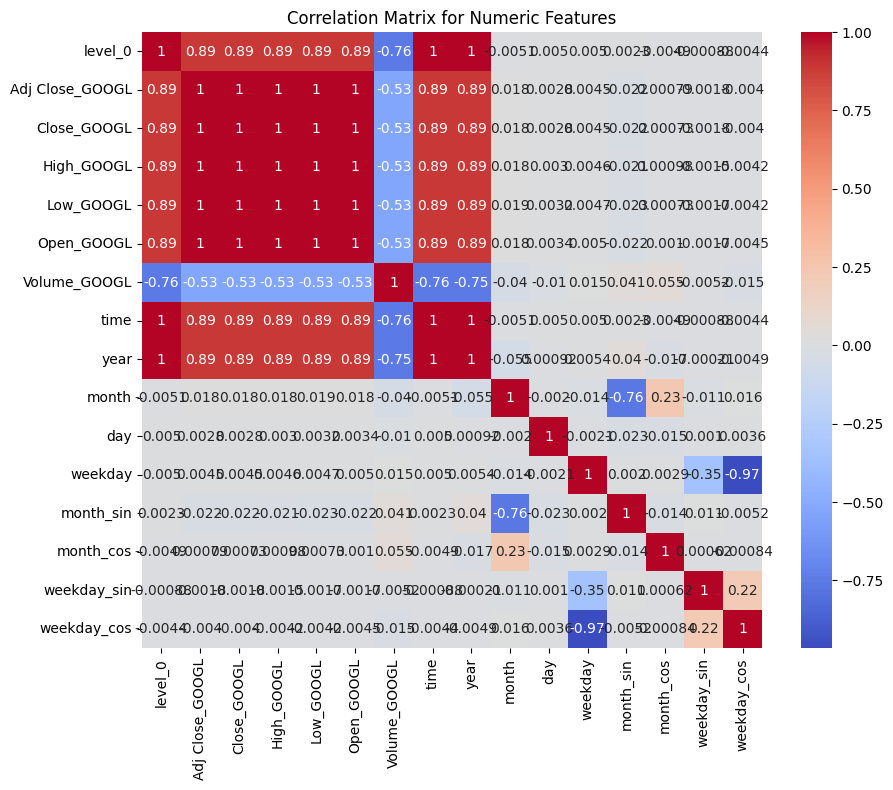

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_data = data_google.select_dtypes(include=[float, int])

# Compute the correlation matrix for numeric features
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numeric Features")
plt.show()


In [30]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
# Adjust feature_cols as needed, for example including engineered date features
X = data_google[['High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Volume_GOOGL', 'year', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos']]
y = data_google['Close_GOOGL']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Lasso with cross-validation to perform feature selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Examine coefficients
feature_importance = pd.Series(lasso.coef_, index=X.columns)
print("Lasso coefficients:\n", feature_importance)


Lasso coefficients:
 High_GOOGL      0.767523
Low_GOOGL       0.133381
Open_GOOGL      0.000000
Volume_GOOGL    0.000000
year            0.003401
month_sin      -0.000000
month_cos       0.000000
weekday_sin     0.000000
weekday_cos     0.000000
dtype: float64


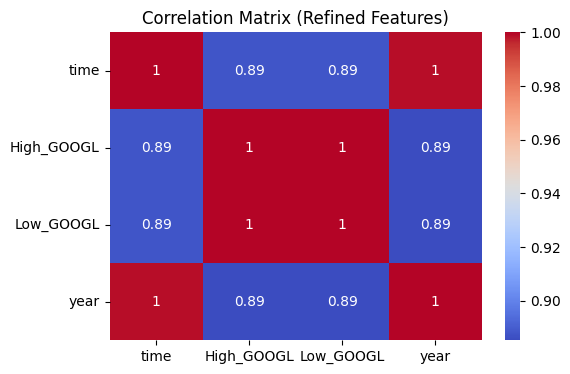

In [31]:
# Create a refined DataFrame with only the significant features:
selected_features = ['High_GOOGL', 'Low_GOOGL', 'year']  # Add any additional features if needed
refined_data = data_google[['Date', 'time', 'group'] + selected_features].copy()

# Optionally, if you want to keep some engineered date features (if they add value):
# refined_data = data_google[['Date', 'time', 'group', 'High_GOOGL', 'Low_GOOGL', 'year', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos']]
import seaborn as sns
import matplotlib.pyplot as plt

numeric_refined = refined_data.select_dtypes(include=[float, int])
corr_matrix_refined = numeric_refined.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_refined, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Refined Features)")
plt.show()


In [32]:
# Create a refined DataFrame with selected features:
selected_features = ['High_GOOGL', 'Low_GOOGL', 'year']
refined_data = data_google[['Date', 'time', 'group', 'Close_GOOGL'] + selected_features].copy()

# (Assuming the earlier cells already created the 'time', 'group', and 'year' features.)
# If not, ensure that in your preprocessing you generate these columns.

from pytorch_forecasting import TimeSeriesDataSet, GroupNormalizer

# Define the maximum encoder and prediction lengths
max_encoder_length = 120  # Use the past 120 days as input for each training sample
max_prediction_length = 30  # Predict the next 30 days

# Determine the training cutoff point ensuring each training sample has a full prediction window
training_cutoff = refined_data["time"].max() - max_prediction_length

# Create the TimeSeriesDataSet; with more historical data, the sliding window will yield more training samples.
training_dataset = TimeSeriesDataSet(
    refined_data[refined_data["time"] <= training_cutoff],
    time_idx="time",
    target="Close_GOOGL",
    group_ids=["group"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=["group"],
    static_reals=["year"],
    time_varying_known_categoricals=[],  
    time_varying_known_reals=["time"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["High_GOOGL", "Low_GOOGL", "Close_GOOGL"],
    target_normalizer=GroupNormalizer(
        groups=["group"],
        transformation="softplus"  # Adjust the transformation as needed
    ),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True  # Allows missing timesteps if necessary
)

# Create the validation dataset from the full refined data (set predict=True and stop randomization)
validation_dataset = TimeSeriesDataSet.from_dataset(
    training_dataset, 
    refined_data, 
    predict=True, 
    stop_randomization=True
)

# Create dataloaders
batch_size = 128  # Adjust based on your hardware capabilities
train_dataloader = training_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation_dataset.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)


In [33]:
from pytorch_forecasting import TemporalFusionTransformer, QuantileLoss
import lightning.pytorch as pl
import torch

# Initialize the TFT model with tuned hyperparameters for improved performance
tft = TemporalFusionTransformer.from_dataset(
    training_dataset,
    learning_rate=0.001,          # Lower learning rate for finer convergence
    hidden_size=128,              # Increased hidden size for higher model capacity
    attention_head_size=8,        # More attention heads to capture complex dependencies
    dropout=0.5,                  # Higher dropout to reduce overfitting
    hidden_continuous_size=64,    # Increased size for continuous variable processing
    loss=QuantileLoss(),          # Using QuantileLoss (standard for TFT forecasting)
    optimizer="adam",             # You may experiment with optimizers (e.g., Ranger) if desired
    reduce_on_plateau_patience=2, # Reduce learning rate sooner if validation loss plateaus
    weight_decay=1e-3             # Added L2 regularization to combat overfitting
)

# Print the model size (optional)
print(f"Number of parameters in network: {tft.size() / 1e3:.1f}k")

# Set up PyTorch Lightning trainer with GPU support
trainer = pl.Trainer(
    max_epochs=100,  # Increase epochs to allow for more training (early stopping can be added if needed)
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Use GPU if available
    devices=1,       # Use 1 GPU
    gradient_clip_val=0.5,  # Clip gradients to avoid explosion
    # Optionally, you can add callbacks (e.g., EarlyStopping, LearningRateMonitor) here
)

# Train the model
trainer.fit(tft, train_dataloader, val_dataloader)


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | Quant

Number of parameters in network: 1103.7k
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:310: The number of training batches (37) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 99: 100%|██████████| 37/37 [00:10<00:00,  3.47it/s, v_num=55, train_loss_step=0.013, val_loss=0.0298, train_loss_epoch=0.0131]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 37/37 [00:10<00:00,  3.40it/s, v_num=55, train_loss_step=0.013, val_loss=0.0298, train_loss_epoch=0.0131]


In [36]:
import torch

# Define the path where the model will be saved
model_path = "C:/Users/deepa/OneDrive/Documents/Project Documents/Stock_Market_Forecasting_using_DeepLearning/WebApp/Models/model_googl.pth"

# Save the trained model's state dictionary
torch.save(tft.state_dict(), model_path)

print(f"Model saved successfully at {model_path}")


Model saved successfully at C:/Users/deepa/OneDrive/Documents/Project Documents/Stock_Market_Forecasting_using_DeepLearning/WebApp/Models/model_googl.pth


***APPLE STOCK DATA***

In [4]:
import yfinance as yf

# Fetch maximum available historical data for Google (GOOGL)
data_apple = yf.download("AAPL", period="max", interval="1d")

# Reset index to keep 'Date' as a column
data_apple.reset_index(inplace=True)

# Display the first few rows
print(data_apple.head())

# Verify the DataFrame structure and columns
print("Columns:", data_apple.columns)


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 AAPL      AAPL      AAPL      AAPL       AAPL
0      1980-12-12  0.098726  0.099155  0.098726  0.098726  469033600
1      1980-12-15  0.093575  0.094005  0.093575  0.094005  175884800
2      1980-12-16  0.086707  0.087136  0.086707  0.087136  105728000
3      1980-12-17  0.088853  0.089282  0.088853  0.088853   86441600
4      1980-12-18  0.091429  0.091858  0.091429  0.091429   73449600
Columns: MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [5]:
data_apple = data_apple.reset_index()
print(data_apple['Date'].head())
data_apple = data_apple.reset_index()
data_apple.columns = [col[0] if col[1] == '' else f"{col[0]}_{col[1]}" for col in data_apple.columns]
if 'index' in data_apple.columns:
    data_apple = data_apple.drop('index', axis=1)

# Create time index and add group identifier
data_apple['time'] = range(len(data_apple))
data_apple['group'] = 'GOOGL'
data_apple.columns

0   1980-12-12
1   1980-12-15
2   1980-12-16
3   1980-12-17
4   1980-12-18
Name: Date, dtype: datetime64[ns]


Index(['level_0', 'Date', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL',
       'Volume_AAPL', 'time', 'group'],
      dtype='object')

In [6]:
# --- Data Quality Improvements Begin Here ---
import pandas as pd
# Check if 'Date' is in columns; if not, reset the index again
if 'Date' not in data_apple.columns:
    data_apple.reset_index(inplace=True)
    print("After resetting index, columns:", data_apple.columns)

# Convert 'Date' to datetime
data_apple['Date'] = pd.to_datetime(data_apple['Date'])

# Continue with sorting and further cleaning
data_apple.sort_values('Date', inplace=True)
data_apple.reset_index(drop=True, inplace=True)

# Check for missing values and fill them
print("Missing values per column:")
print(data_apple.isnull().sum())
data_apple.fillna(method='ffill', inplace=True)

# Remove duplicate rows
data_apple.drop_duplicates(inplace=True)

# Outlier removal (example for key numerical columns)
from scipy import stats
import numpy as np
for col in ['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL']:
    z_scores = np.abs(stats.zscore(data_apple[col]))
    data_apple = data_apple[z_scores < 3]

# Feature engineering: Extract additional date features
data_apple['year'] = data_apple['Date'].dt.year
data_apple['month'] = data_apple['Date'].dt.month
data_apple['day'] = data_apple['Date'].dt.day
data_apple['weekday'] = data_apple['Date'].dt.weekday
data_apple['month_sin'] = np.sin(2 * np.pi * data_apple['month'] / 12)
data_apple['month_cos'] = np.cos(2 * np.pi * data_apple['month'] / 12)
data_apple['weekday_sin'] = np.sin(2 * np.pi * data_apple['weekday'] / 7)
data_apple['weekday_cos'] = np.cos(2 * np.pi * data_apple['weekday'] / 7)

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
num_cols = ['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL']
scaler = MinMaxScaler()
data_apple[num_cols] = scaler.fit_transform(data_apple[num_cols])

print("Data quality improvements complete.")
print(data_apple.head())


Missing values per column:
level_0        0
Date           0
Close_AAPL     0
High_AAPL      0
Low_AAPL       0
Open_AAPL      0
Volume_AAPL    0
time           0
group          0
dtype: int64


C:\Users\deepa\AppData\Local\Temp\ipykernel_4124\1393882256.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_apple.fillna(method='ffill', inplace=True)


Data quality improvements complete.
   level_0       Date  Close_AAPL  High_AAPL  Low_AAPL  Open_AAPL  \
0        0 1980-12-12    0.001179   0.001177  0.001203   0.001191   
1        1 1980-12-15    0.001080   0.001078  0.001102   0.001098   
2        2 1980-12-16    0.000947   0.000945  0.000966   0.000963   
3        3 1980-12-17    0.000988   0.000987  0.001008   0.000997   
4        4 1980-12-18    0.001038   0.001036  0.001059   0.001048   

   Volume_AAPL  time  group  year  month  day  weekday     month_sin  \
0     0.339021     0  GOOGL  1980     12   12        4 -2.449294e-16   
1     0.127131     1  GOOGL  1980     12   15        0 -2.449294e-16   
2     0.076421     2  GOOGL  1980     12   16        1 -2.449294e-16   
3     0.062481     3  GOOGL  1980     12   17        2 -2.449294e-16   
4     0.053090     4  GOOGL  1980     12   18        3 -2.449294e-16   

   month_cos  weekday_sin  weekday_cos  
0        1.0    -0.433884    -0.900969  
1        1.0     0.000000     1.00

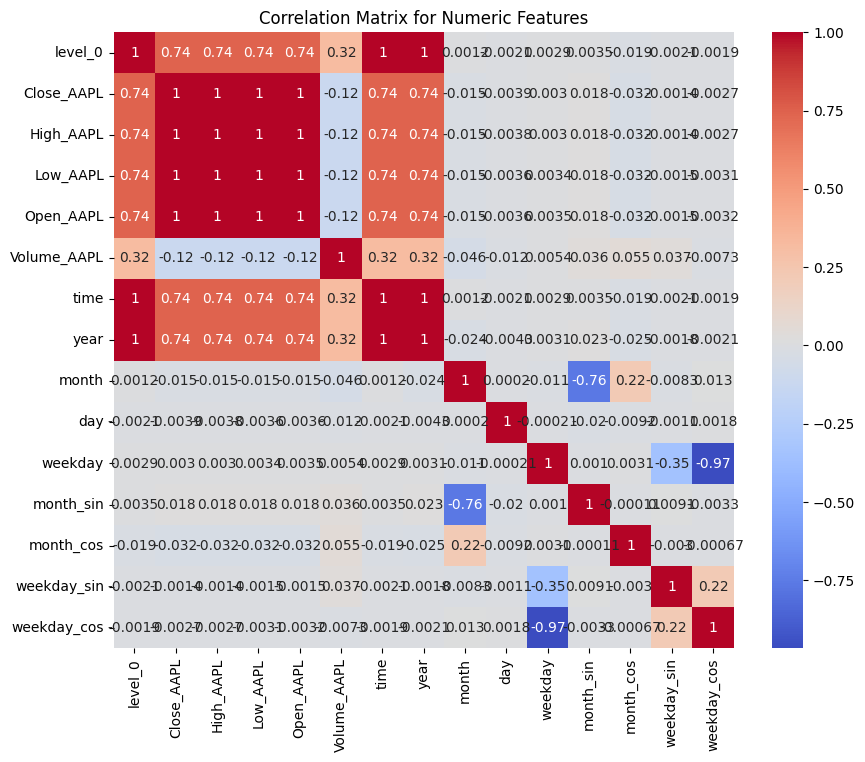

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_data = data_apple.select_dtypes(include=[float, int])

# Compute the correlation matrix for numeric features
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numeric Features")
plt.show()


In [8]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
# Adjust feature_cols as needed, for example including engineered date features
X = data_apple[['High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'year', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos']]
y = data_apple['Close_AAPL']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Lasso with cross-validation to perform feature selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Examine coefficients
feature_importance = pd.Series(lasso.coef_, index=X.columns)
print("Lasso coefficients:\n", feature_importance)


Lasso coefficients:
 High_AAPL      0.551830
Low_AAPL       0.243497
Open_AAPL      0.115975
Volume_AAPL   -0.000000
year           0.001164
month_sin     -0.000000
month_cos     -0.000000
weekday_sin    0.000000
weekday_cos   -0.000000
dtype: float64


c:\Users\deepa\OneDrive\Documents\Project Documents\Stock_Market_Forecasting_using_DeepLearning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.454e-02, tolerance: 3.720e-02
  model = cd_fast.enet_coordinate_descent(


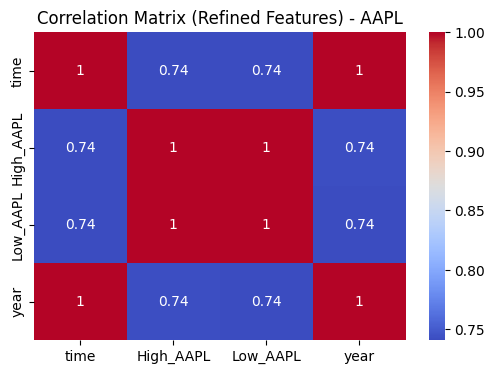

In [9]:
# Select refined features
selected_features = ['High_AAPL', 'Low_AAPL', 'year']
refined_data = data_apple[['Date', 'time', 'group'] + selected_features].copy()

import seaborn as sns
import matplotlib.pyplot as plt

numeric_refined = refined_data.select_dtypes(include=[float, int])
corr_matrix_refined = numeric_refined.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_refined, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Refined Features) - AAPL")
plt.show()


In [10]:
# Create a refined DataFrame with selected features:
selected_features = ['High_AAPL', 'Low_AAPL', 'year']
refined_data = data_apple[['Date', 'time', 'group', 'Close_AAPL'] + selected_features].copy()

# (Assuming the earlier cells already created the 'time', 'group', and 'year' features.)
# If not, ensure that in your preprocessing you generate these columns.

from pytorch_forecasting import TimeSeriesDataSet, GroupNormalizer

# Define the maximum encoder and prediction lengths
max_encoder_length = 120  # Use the past 120 days as input for each training sample
max_prediction_length = 30  # Predict the next 30 days

# Determine the training cutoff point ensuring each training sample has a full prediction window
training_cutoff = refined_data["time"].max() - max_prediction_length

# Create the TimeSeriesDataSet; with more historical data, the sliding window will yield more training samples.
training_dataset = TimeSeriesDataSet(
    refined_data[refined_data["time"] <= training_cutoff],
    time_idx="time",
    target="Close_AAPL",
    group_ids=["group"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=["group"],
    static_reals=["year"],
    time_varying_known_categoricals=[],  
    time_varying_known_reals=["time"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["High_AAPL", "Low_AAPL", "Close_AAPL"],
    target_normalizer=GroupNormalizer(
        groups=["group"],
        transformation="softplus"  # Adjust the transformation as needed
    ),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True  # Allows missing timesteps if necessary
)

# Create the validation dataset from the full refined data (set predict=True and stop randomization)
validation_dataset = TimeSeriesDataSet.from_dataset(
    training_dataset, 
    refined_data, 
    predict=True, 
    stop_randomization=True
)

# Create dataloaders
batch_size = 128  # Adjust based on your hardware capabilities
train_dataloader = training_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation_dataset.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)


c:\Users\deepa\OneDrive\Documents\Project Documents\Stock_Market_Forecasting_using_DeepLearning\.venv\Lib\site-packages\pytorch_forecasting\models\base_model.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [14]:
from pytorch_forecasting import TemporalFusionTransformer, QuantileLoss
import lightning.pytorch as pl
import torch

# Initialize the TFT model with tuned hyperparameters for improved performance
tft = TemporalFusionTransformer.from_dataset(
    training_dataset,
    learning_rate=0.001,          # Lower learning rate for finer convergence
    hidden_size=128,              # Increased hidden size for higher model capacity
    attention_head_size=8,        # More attention heads to capture complex dependencies
    dropout=0.5,                  # Higher dropout to reduce overfitting
    hidden_continuous_size=64,    # Increased size for continuous variable processing
    loss=QuantileLoss(),          # Using QuantileLoss (standard for TFT forecasting)
    optimizer="adam",             # You may experiment with optimizers (e.g., Ranger) if desired
    reduce_on_plateau_patience=2, # Reduce learning rate sooner if validation loss plateaus
    weight_decay=1e-3             # Added L2 regularization to combat overfitting
)

# Print the model size (optional)
print(f"Number of parameters in network: {tft.size() / 1e3:.1f}k")

# Set up PyTorch Lightning trainer with GPU support
trainer = pl.Trainer(
    max_epochs=100,  # Increase epochs to allow for more training (early stopping can be added if needed)
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Use GPU if available
    devices=1,       # Use 1 GPU
    gradient_clip_val=0.5,  # Clip gradients to avoid explosion
    # Optionally, you can add callbacks (e.g., EarlyStopping, LearningRateMonitor) here
)

# Train the model
trainer.fit(tft, train_dataloader, val_dataloader)


GPU available: True (cuda), used: True


Number of parameters in network: 1103.7k


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | ModuleDict                      | 1.2 K  | train
4  | static_variable_selection          | VariableSelectionNetwork        | 104 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 131 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 52.0 K | train
7  | static_context_variable_selection  | GatedResidual

Epoch 58:  89%|████████▊ | 63/71 [00:18<00:02,  3.50it/s, v_num=62, train_loss_step=0.00692, val_loss=0.0536, train_loss_epoch=0.00698]   


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined